In [1]:
from MatlabFuncs import *
from model import *
from triangle import *
from bamg import bamg
from savevars import *
import plotdoc
from loadmodel import *
from os.path import exists

from scipy.io import loadmat
from m1qn3inversion import *
import numpy as np
from ContourToNodes import *
from solve import *

#import lhsmdu #install in terminal 'pip install lhsmdu'
import matplotlib.pyplot as plt
import pickle

import numpy as np
from osgeo import gdal

import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib import pyplot as plt

from InterpFromGridToMesh import InterpFromGridToMesh
from InterpFromMeshToMesh2d import InterpFromMeshToMesh2d

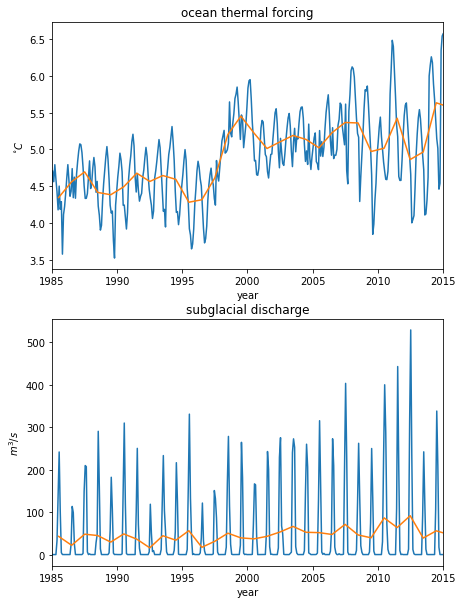

In [24]:
# Assigning ocean thermal (EN4) and subglacial discharge (RACMO2.3p2) forcings
from scipy_io_utils import *

# Load historical forcing data
glacier_list = list()
m = loadmat('./Cheat_matfiles/glacier0013.mat')
glacier0013 = m['glacier0013']
m = loadmat('./Cheat_matfiles/glacier0052.mat')
glacier0052 = m['glacier0052']
m = loadmat('./Cheat_matfiles/glacier0053.mat')
glacier0053 = m['glacier0053']
m = loadmat('./Cheat_matfiles/glacier0090.mat')
glacier0090 = m['glacier0090']

# Annual averages
def ocean_forcing_annual_avg(glacier):
    t_annual = np.arange(1985.5, 2016.5)

    TF_avg = np.empty(t_annual.shape)
    Q_avg  = np.empty(t_annual.shape)
    for i, t in enumerate(t_annual):
        idx = (glacier['EN4']['t'] >= t-0.5) & (glacier['EN4']['t'] < t+0.5)
        TF_avg[i] = np.mean(glacier['EN4']['TF'][idx])
        idx = (glacier['RACMO']['t'] >= t-0.5) & (glacier['RACMO']['t'] < t+0.5)
        Q_avg[i] = np.mean(glacier['RACMO']['Q'][idx])

    return t_annual, TF_avg, Q_avg

t_annual, TF_avg, Q_avg = ocean_forcing_annual_avg(glacier0013)

# Plot - thermal forcing
glacier = glacier0013
fig, ax = plt.subplots(2,1,figsize=(7,10))
ax[0].plot(glacier0013['EN4']['t'], glacier0013['EN4']['TF'])
ax[0].plot(t_annual, TF_avg)
ax[0].set_title('ocean thermal forcing')
ax[0].set_xlabel('year')
ax[0].set_ylabel('$^{\circ} C$')
ax[0].set_xlim(1985, 2015)

# Plot - subglacial discharge
ax[1].plot(glacier0013['RACMO']['t'], glacier0013['RACMO']['Q'])
ax[1].plot(t_annual, Q_avg)
ax[1].set_title('subglacial discharge')
ax[1].set_xlabel('year')
ax[1].set_ylabel('$m^3/s$')
ax[1].set_xlim(1985, 2015)

plt.savefig('glacier0013_ocean_forcing.pdf', bbox_inches='tight')

t_annual, TF_avg, Q_avg = ocean_forcing_annual_avg(glacier0052)
glacier0052['EN4']['t'] = t_annual
glacier0052['EN4']['TF'] = TF_avg
glacier0052['RACMO']['t'] = t_annual
glacier0052['RACMO']['Q'] = Q_avg

t_annual, TF_avg, Q_avg = ocean_forcing_annual_avg(glacier0053)
glacier0053['EN4']['t'] = t_annual
glacier0053['EN4']['TF'] = TF_avg
glacier0053['RACMO']['t'] = t_annual
glacier0053['RACMO']['Q'] = Q_avg

t_annual, TF_avg, Q_avg = ocean_forcing_annual_avg(glacier0090)
glacier0090['EN4']['t'] = t_annual
glacier0090['EN4']['TF'] = TF_avg
glacier0090['RACMO']['t'] = t_annual
glacier0090['RACMO']['Q'] = Q_avg
